In [35]:
import pandas as pd

In [4]:
ref = "hello"
word = "hell"
ref[len(word):] 

'o'

In [1]:
import numpy as np

np.log(1/27)

np.float64(-3.295836866004329)

In [36]:
rel = pd.read_csv("europe_religion.csv")
iq = pd.read_csv("smartest-countries-2025.csv")

In [37]:
def clean_data(ref_df,df):
    ref_countries = list(ref_df['Country'])
    df = df[df["country"].isin(ref_countries)]
    ref_df = ref_df[ref_df["Country"].isin(df['country'])]
    return ref_df,df

rel,iq = clean_data(rel,iq)

In [38]:
print(f"{len(rel)=}")
print(f"{len(iq)=}")

len(rel)=43
len(iq)=43


In [39]:
rel.head()

,Country,Percentage
0,Estonia,16%
1,Sweden,17%
2,Denmark,19%
3,Norway,21%
5,United Kingdom,27%


In [40]:
iq = iq.sort_values(by="averageIqByCountry_iqLynnBecker2019",ascending=False).reset_index(drop=True)
iq.head()

,flagCode,country,averageIqByCountry_iqLynnBecker2019,averageIqByCountry_sourceLynnBecker2019,AverageIQ_ICI2017Score,AverageIQ_ICI2017Grade
0,BY,Belarus,101.60,T,NaN,NaN
1,FI,Finland,101.20,T,60.5,A
2,DE,Germany,100.74,T,64.2,A
3,NL,Netherlands,100.74,T,58.7,A-
4,EE,Estonia,100.72,T,49.5,B


In [41]:
rel["rank"] = list(range(1,len(rel) +1))
iq["rank"] = list(range(1,len(rel) +1))

iq = iq.sort_values(by="country",ascending=False).reset_index(drop=True)
rel = rel.sort_values(by="Country",ascending=False).reset_index(drop=True)



In [44]:
def calculate_spearman_rc_coeff(df1,df2):
    rx = list(df1['rank'])
    ry = list(df2['rank'])
    

    assert len(rx) == len(ry)
    n = len(rx)

    d_sq = [(x-y)**2 for x,y in zip(rx,ry)]

    rs = 1 - ((6 * sum(d_sq))/(n*(n**2 -1)))
    return rs, rx,ry

print(calculate_spearman_rc_coeff(rel,iq)[0])


0.6706433101781939


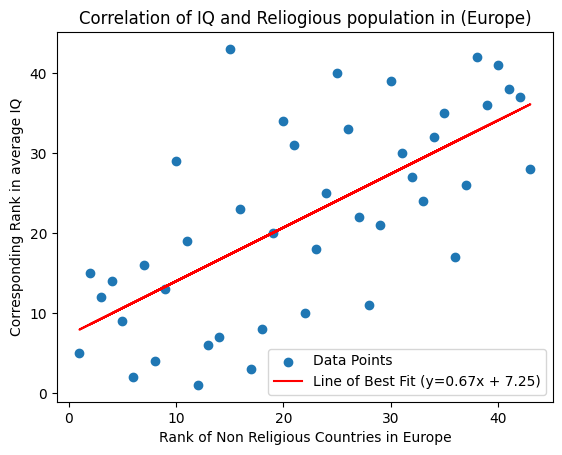

In [50]:
import matplotlib.pyplot as plt
import numpy as np

_,x,y = calculate_spearman_rc_coeff(rel,iq)
x,y = np.array(x),np.array(y)
m, b = np.polyfit(x, y, 1)
plt.scatter(x,y,label='Data Points')
plt.plot(x,m*x +b,color="red",label=f'Line of Best Fit (y={m:.2f}x + {b:.2f})')
plt.xlabel("Rank of Non Religious Countries in Europe")
plt.ylabel("Corresponding Rank in average IQ")
plt.title("Correlation of IQ and Reliogious population in (Europe)")
plt.legend()
plt.show()